# Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("salesmonthly.csv")
df['datum'] = pd.to_datetime(df['datum'])
df = df[['datum', 'M01AB', 'R06']]
df = df.set_index('datum')
test_data = df[(df.index >= '2018-01-31') & (df.index <= '2019-10-31')]
test_data

,M01AB,R06
datum,,
2018-01-31,132.28,49.50
2018-02-28,128.36,39.06
2018-03-31,146.16,85.50
2018-04-30,170.02,197.10
2018-05-31,160.52,213.04
2018-06-30,141.18,120.80
2018-07-31,150.18,122.20
2018-08-31,140.00,103.10
2018-09-30,153.52,88.10


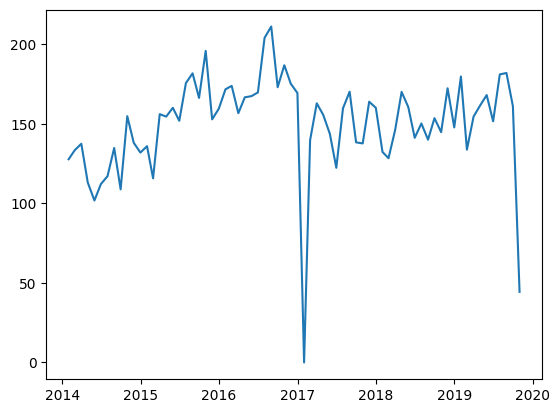

In [ ]:
data=pd.read_csv("salesmonthly.csv")
# Preprocess the data
data['datum'] = pd.to_datetime(data['datum'])
data = data[['datum', 'M01AB', 'R06']]
data = data.set_index('datum')
plt.plot(data['M01AB'])

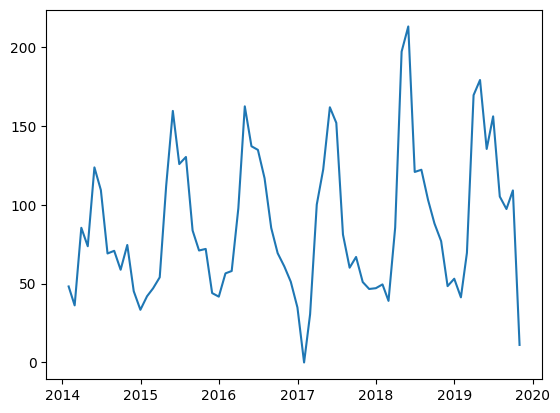

In [ ]:
plt.plot(data['R06'])

# M01AB

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


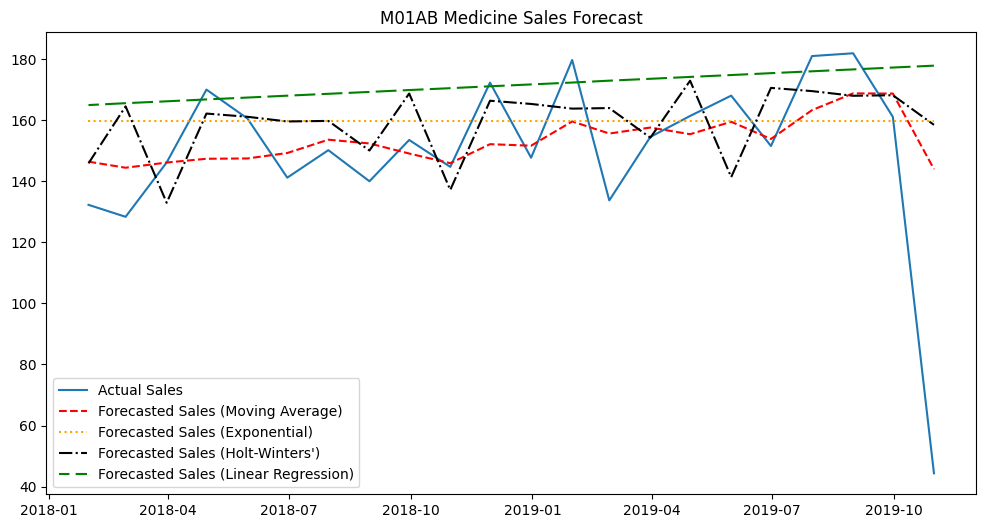

,Additive
$\alpha$,0.282819
$\beta$,0.000105
$\phi$,NaN
$\gamma$,0.000438
$l_0$,123.173958
$b_0$,0.600702
SSE,39465.872925


In [ ]:
data=pd.read_csv("salesmonthly.csv")
# Preprocess the data
data['datum'] = pd.to_datetime(data['datum'])
data = data[['datum', 'M01AB', 'R06']]
data = data.set_index('datum')

#Apply Moving Average
data['M01AB forecasts'] = data['M01AB'].rolling(window=5).mean()

# Split the data into training and testing sets
train_data = data[data.index < '2018-01-31']
test_data = data[(data.index >= '2018-01-31') & (data.index <= '2019-10-31')]

# Define the independent variable (Date) and the target variables (M01AB and R06 sales)
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train_M01AB = train_data['M01AB']

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['M01AB'], label='Actual Sales')
plt.plot(test_data['M01AB forecasts'], label='Forecasted Sales (Moving Average)',linestyle='dashed', color='red')
plt.title('M01AB Medicine Sales Forecast')

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(train_data['M01AB'])
model_fit = model.fit(smoothing_level=0.8, optimized=False)

# Forecast sales for the testing period
forecast_exp = model_fit.forecast(len(test_data))

# Plot the actual and forecasted values
plt.plot(test_data.index, forecast_exp, label='Forecasted Sales (Exponential)',linestyle='dotted', color='orange')

# Apply Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(train_data['M01AB'], seasonal_periods=7, trend="add", seasonal="add")
model_fit = model.fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [model_fit.params[p] for p in params] + [model_fit.sse]
# Forecast sales for the testing period
forecast_win = model_fit.forecast(steps=len(test_data))

# Plot the actual and forecasted values
plt.plot(test_data.index, forecast_win, label='Forecasted Sales (Holt-Winters\')',linestyle='dashdot', color='black')

X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

# Apply Linear Regression for M01AB
model_M01AB = LinearRegression()
model_M01AB.fit(X_train, y_train_M01AB)

# Forecast M01AB sales for the testing period
forecast_linreg = model_M01AB.predict(X_test)

# Plot the actual and forecasted values for M01AB
plt.plot(test_data.index, forecast_linreg, label='Forecasted Sales (Linear Regression)',linestyle=(5,(10,3)), color='green')
plt.legend()
plt.show()
results

# R06

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


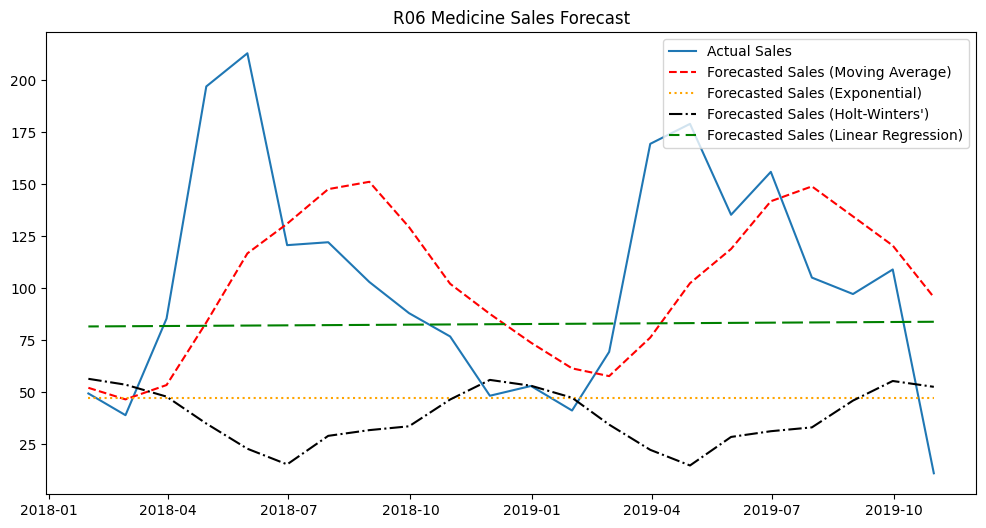

,Additive
$\alpha$,0.998445
$\beta$,0.001523
$\phi$,NaN
$\gamma$,0.000006
$l_0$,41.096672
$b_0$,-0.050209
SSE,38028.802415


In [ ]:
data=pd.read_csv("salesmonthly.csv")
# Preprocess the data
data['datum'] = pd.to_datetime(data['datum'])
data = data[['datum', 'M01AB', 'R06']]
data = data.set_index('datum')

#Apply Moving Average
data['R06 forecasts'] = data['R06'].rolling(window=5).mean()

# Split the data into training and testing sets
train_data = data[data.index < '2018-01-31']
test_data = data[(data.index >= '2018-01-31') & (data.index <= '2019-10-31')]

# Define the independent variable (Date) and the target variables (R06 and R06 sales)
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train_R06 = train_data['R06']

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['R06'], label='Actual Sales')
plt.plot(test_data['R06 forecasts'], label='Forecasted Sales (Moving Average)',linestyle='dashed', color='red')
plt.title('R06 Medicine Sales Forecast')

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(train_data['R06'])
model_fit = model.fit(smoothing_level=0.8, optimized=False)

# Forecast sales for the testing period
forecast_exp = model_fit.forecast(len(test_data))

# Plot the actual and forecasted values
plt.plot(test_data.index, forecast_exp, label='Forecasted Sales (Exponential)',linestyle='dotted', color='orange')

# Apply Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(train_data['R06'], seasonal_periods=10, trend="add", seasonal="add")
model_fit = model.fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [model_fit.params[p] for p in params] + [model_fit.sse]
# Forecast sales for the testing period
forecast_win = model_fit.forecast(steps=len(test_data))

# Plot the actual and forecasted values
plt.plot(test_data.index, forecast_win, label='Forecasted Sales (Holt-Winters\')',linestyle='dashdot', color='black')

X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

# Apply Linear Regression for R06
model_R06 = LinearRegression()
model_R06.fit(X_train, y_train_R06)

# Forecast R06 sales for the testing period
forecast_linreg = model_R06.predict(X_test)

# Plot the actual and forecasted values for R06
plt.plot(test_data.index, forecast_linreg, label='Forecasted Sales (Linear Regression)',linestyle=(5,(10,3)), color='green')
plt.legend()
plt.show()
results

# Moving Average

In [ ]:
print("M01AB")
mad=mean_absolute_error(test['M01AB'],test['M01AB forecasts'])
print('MAD:',mad)
mape=mean_absolute_percentage_error(test['M01AB'],test['M01AB forecasts'])
print('MAPE:',mape)
mse=mean_squared_error(test['M01AB'],test['M01AB forecasts'])
print('MSE:',mse)

print("R06")
mad=mean_absolute_error(test['R06'],test['R06 forecasts'])
print('MAD:',mad)
mape=mean_absolute_percentage_error(test['R06'],test['R06 forecasts'])
print('MAPE:',mape)
mse=mean_squared_error(test['R06'],test['R06 forecasts'])
print('MSE:',mse)

M01AB
MAD: 14.526090909090918
MAPE: 0.16624032374402545
MSE: 604.0230409090917
R06
MAD: 39.6469090909091
MAPE: 0.6714200564721508
MSE: 2581.1675316363635


# Exponential Smoothing

In [ ]:
print('M01AB')
mad=mean_absolute_error(test_data['M01AB'],forecast)
print('MAD:',mad)
mape=mean_absolute_percentage_error(test_data['M01AB'],forecast)
print('MAPE:',mape)
mse=mean_squared_error(test_data['M01AB'],forecast)
print('MSE:',mse)

print('R06')
mad=mean_absolute_error(test_data['R06'],forecast1)
print('MAD:',mad)
mape=mean_absolute_percentage_error(test_data['R06'],forecast1)
print('MAPE:',mape)
mse=mean_squared_error(test_data['R06'],forecast1)
print('MSE:',mse)

M01AB
MAD: 18.491016623719418
MAPE: 0.20673179170607012
MSE: 860.7010338197134
R06
MAD: 60.47876134135929
MAPE: 0.5969140897882088
MSE: 5978.788698398624


# Winters' Smoothing

In [ ]:
print("M01AB")
mad=mean_absolute_error(test_data['M01AB'],forecast_win)
print('MAD:',mad)
mape=mean_absolute_percentage_error(test_data['M01AB'],forecast_win)
print('MAPE:',mape)
mse=mean_squared_error(test_data['M01AB'],forecast_win)
print('MSE:',mse)

print("R06")
mad=mean_absolute_error(test_data['R06'],forecast_win)
print('MAD:',mad)
mape=mean_absolute_percentage_error(test_data['R06'],forecast_win)
print('MAPE:',mape)
mse=mean_squared_error(test_data['R06'],forecast_win)
print('MSE:',mse)

M01AB
MAD: 18.454158762933172
MAPE: 0.20560730652736
MSE: 848.39698591437
R06
MAD: 65.94503742400833
MAPE: 1.5078470240843964
MSE: 5987.966259068743


# Linear Regression

In [ ]:
print('M01AB')
mad=mean_absolute_error(test_data['M01AB'],forecast_M01AB)
print('MAD:',mad)
mape=mean_absolute_percentage_error(test_data['M01AB'],forecast_M01AB)
print('MAPE:',mape)
mse=mean_squared_error(test_data['M01AB'],forecast_M01AB)
print('MSE:',mse)

print('R06')
mad=mean_absolute_error(test_data['R06'],forecast_R06)
print('MAD:',mad)
mape=mean_absolute_percentage_error(test_data['R06'],forecast_R06)
print('MAPE:',mape)
mse=mean_squared_error(test_data['R06'],forecast_R06)
print('MSE:',mse)

M01AB
MAD: 23.219107290885415
MAPE: 0.25506451620521325
MSE: 1236.446908362763
R06
MAD: 45.184199882564236
MAPE: 0.7026206657274852
MSE: 3271.7026267911583
